# Ford Gobike Data Exploration
## by Salma Hasan Abokamar

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
gbike = pd.read_csv('fordgobike.csv')
gbike.shape


(183412, 16)

In [3]:
gbike.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
gbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
#changing data type


gbike[["start_time", "end_time"]] = gbike[["start_time", "end_time"]].apply(pd.to_datetime)

gbike.bike_share_for_all_trip == 'Yes'


0         False
1         False
2         False
3         False
4          True
5         False
6         False
7         False
8         False
9         False
10         True
11        False
12        False
13        False
14        False
15         True
16        False
17        False
18        False
19        False
20        False
21         True
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
183382    False
183383    False
183384    False
183385     True
183386     True
183387     True
183388    False
183389    False
183390    False
183391     True
183392    False
183393    False
183394    False
183395     True
183396     True
183397    False
183398    False
183399    False
183400    False
183401     True
183402    False
183403    False
183404     True
183405    False
183406    False
183407    False
183408    False
183409     True
183410    False
183411    False
Name: bike_share_for_all

In [6]:
#drop unwanted col.
gbike.drop(['start_station_latitude','start_station_longitude', 'start_station_id','end_station_name',
            'end_station_latitude', 'end_station_longitude', 'bike_id'], axis = 1)


,duration_sec,start_time,end_time,start_station_name,end_station_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),13.0,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,The Embarcadero at Steuart St,81.0,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,3.0,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,70.0,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,222.0,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,323.0,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,Palm St at Willow St,312.0,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,Washington St at Kearny St,127.0,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,Washington St at Kearny St,127.0,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,Post St at Kearny St,121.0,Subscriber,1992.0,Male,No


### What is the structure of your dataset?

it is (183412, 16)

183412 row (fordgobike trips) and 16 variables or features(9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.)
### What is/are the main feature(s) of interest in your dataset?


How long does the average trip take?(duration)

Does the above depend on if a user is a subscriber or customer?
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

duration_sec

start_time	end_time	

start_station_name		end_station_name

user_type	

member_birth_year

member_gender	

bike_share_for_all_trip

## Univariate Exploration


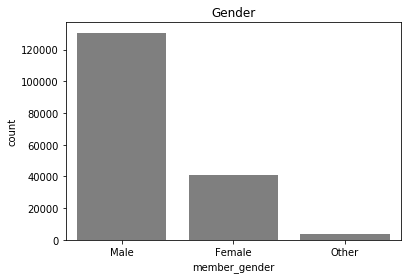

In [7]:
gen_order = gbike['member_gender'].value_counts().index

base_color = sb.color_palette()[7]
sb.countplot(data=gbike, x='member_gender', color=base_color, order = gen_order)
plt.title('Gender');


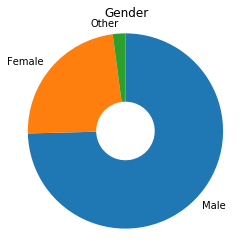

In [8]:
sorted_counts = gbike['member_gender'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.7})


plt.axis('square')
plt.title('Gender');

As we see Males are more than females with large number in difference 

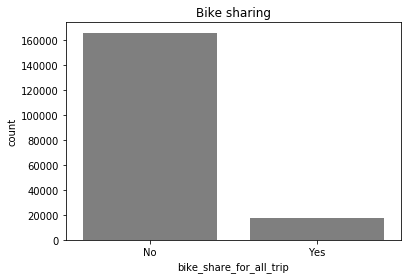

In [9]:

base_color = sb.color_palette()[7]
sb.countplot(data=gbike, x='bike_share_for_all_trip', color=base_color)
plt.title('Bike sharing');

As we see in our bar chart No is the highest  count for our feature bike share for all trip 

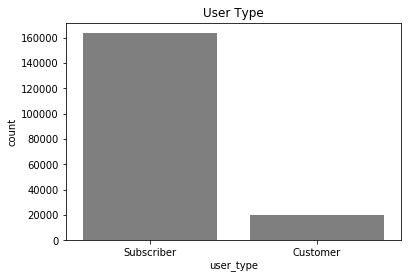

In [10]:
gen_order = gbike['user_type'].value_counts().index

base_color = sb.color_palette()[7]
sb.countplot(data=gbike, x='user_type', color=base_color, order = gen_order)
plt.title('User Type');

user type of it is Subscribers are more than customers

In [11]:
#missing values in end_staion_name column
gbike['end_station_name'].isna()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
183382    False
183383    False
183384    False
183385    False
183386    False
183387    False
183388    False
183389    False
183390    False
183391    False
183392    False
183393    False
183394    False
183395    False
183396    False
183397    False
183398    False
183399    False
183400    False
183401    False
183402    False
183403    False
183404    False
183405    False
183406    False
183407    False
183408    False
183409    False
183410    False
183411    False
Name: end_station_name, 

In [12]:
# counts of null values in each column
gbike.isna().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [13]:
#copy data for specific cleaning
bike = gbike.copy()

In [14]:
#drop the column that do not have any NaN/None values
na_counts = bike.drop(['duration_sec',
'start_time',
'end_time', 
'start_station_latitude',
'start_station_longitude',
'end_station_latitude',
'end_station_longitude',
'bike_id' , 
'user_type',
'bike_share_for_all_trip'], axis=1).isna().sum()
print(na_counts)

start_station_id       197
start_station_name     197
end_station_id         197
end_station_name       197
member_birth_year     8265
member_gender         8265
dtype: int64


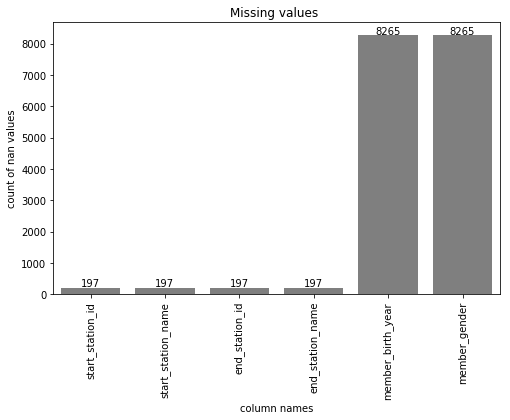

In [15]:
#changing size of the figure
plt.figure(figsize = [8, 5])
#plot the graph 
ax =sb.barplot(na_counts.index.values, na_counts, color=base_color)
ax.set(xlabel='column names', ylabel='count of nan values')
plt.title('Missing values ');
# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]

    plt.text(i, count+300, count, ha = 'center', va='top')

huge number of missing values in birth year and gender that maybe effect on our findings 

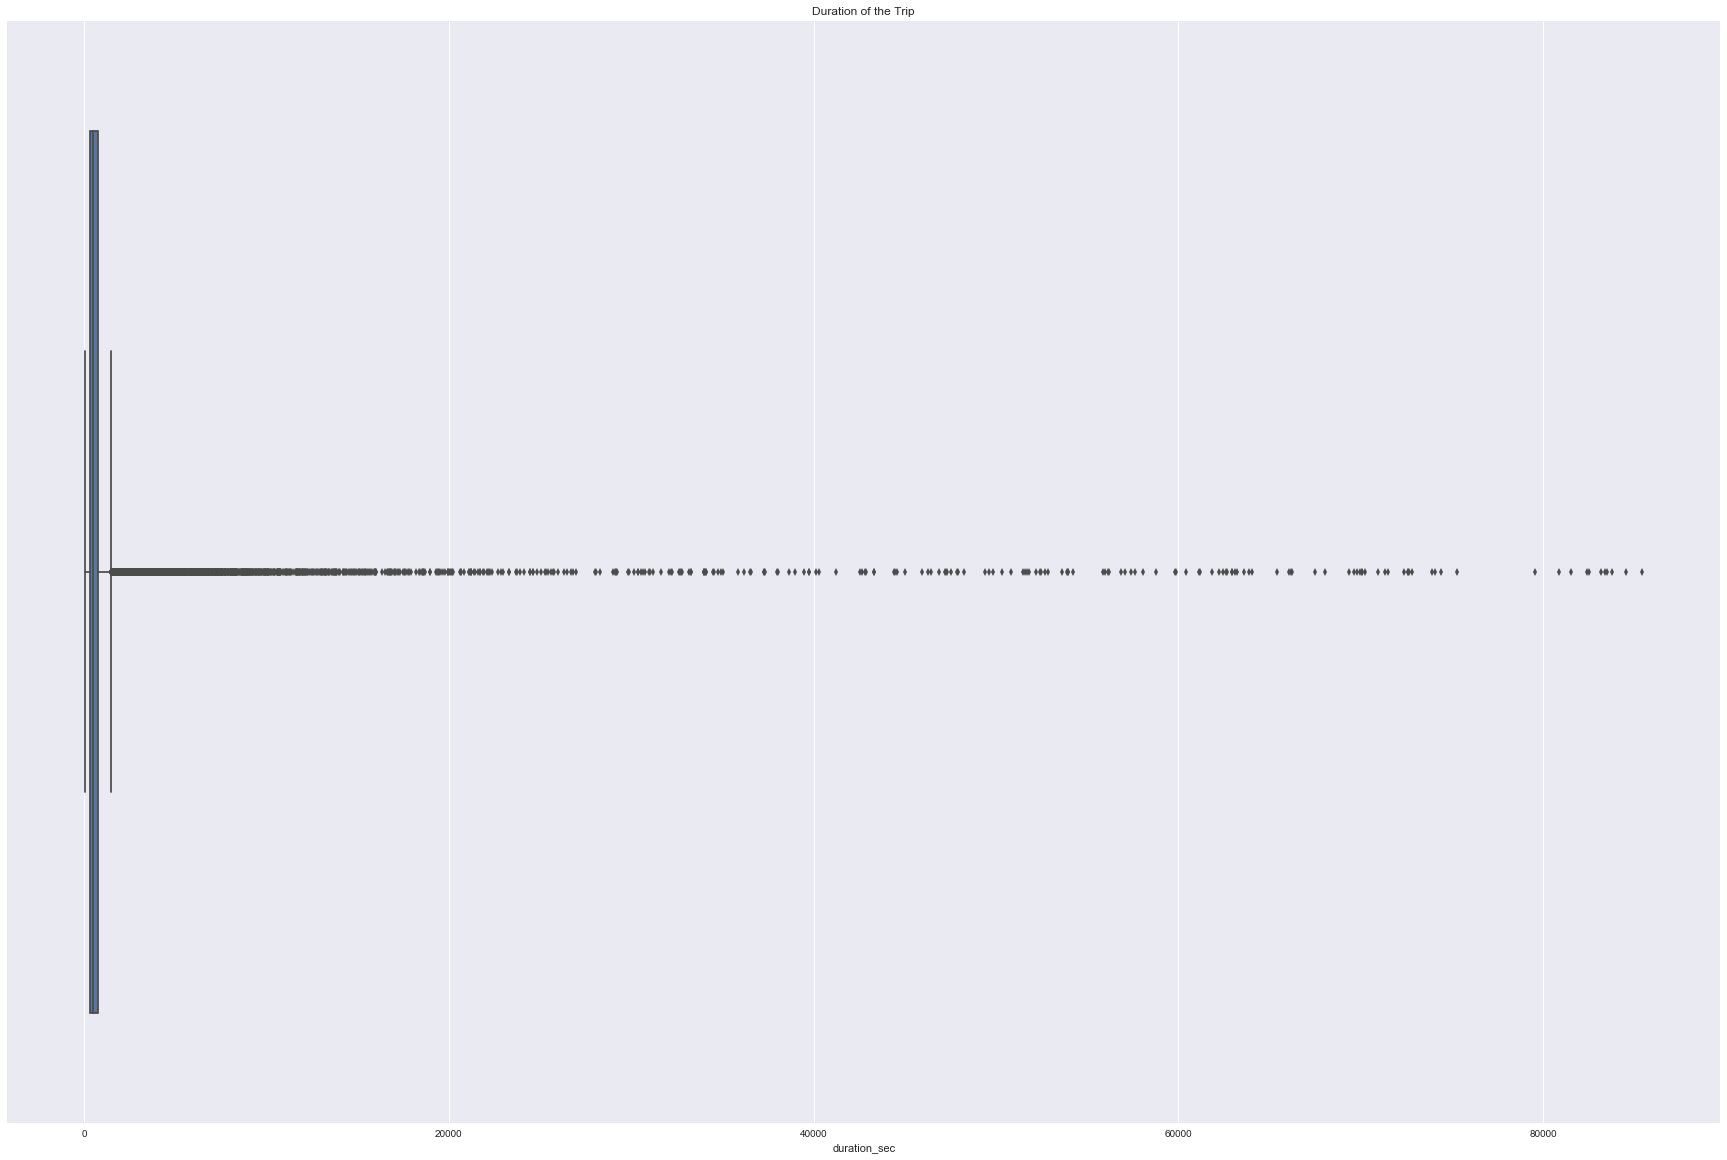

In [16]:
#plot boxplot to see some of the outliers 
sb.set(rc={'figure.figsize':(30.7,20.27)})

sb.boxplot(x=gbike["duration_sec"])
plt.title('Duration of the Trip');

there are alot of outliers in our variable of interest 

#### How the Duration of trip distributed?

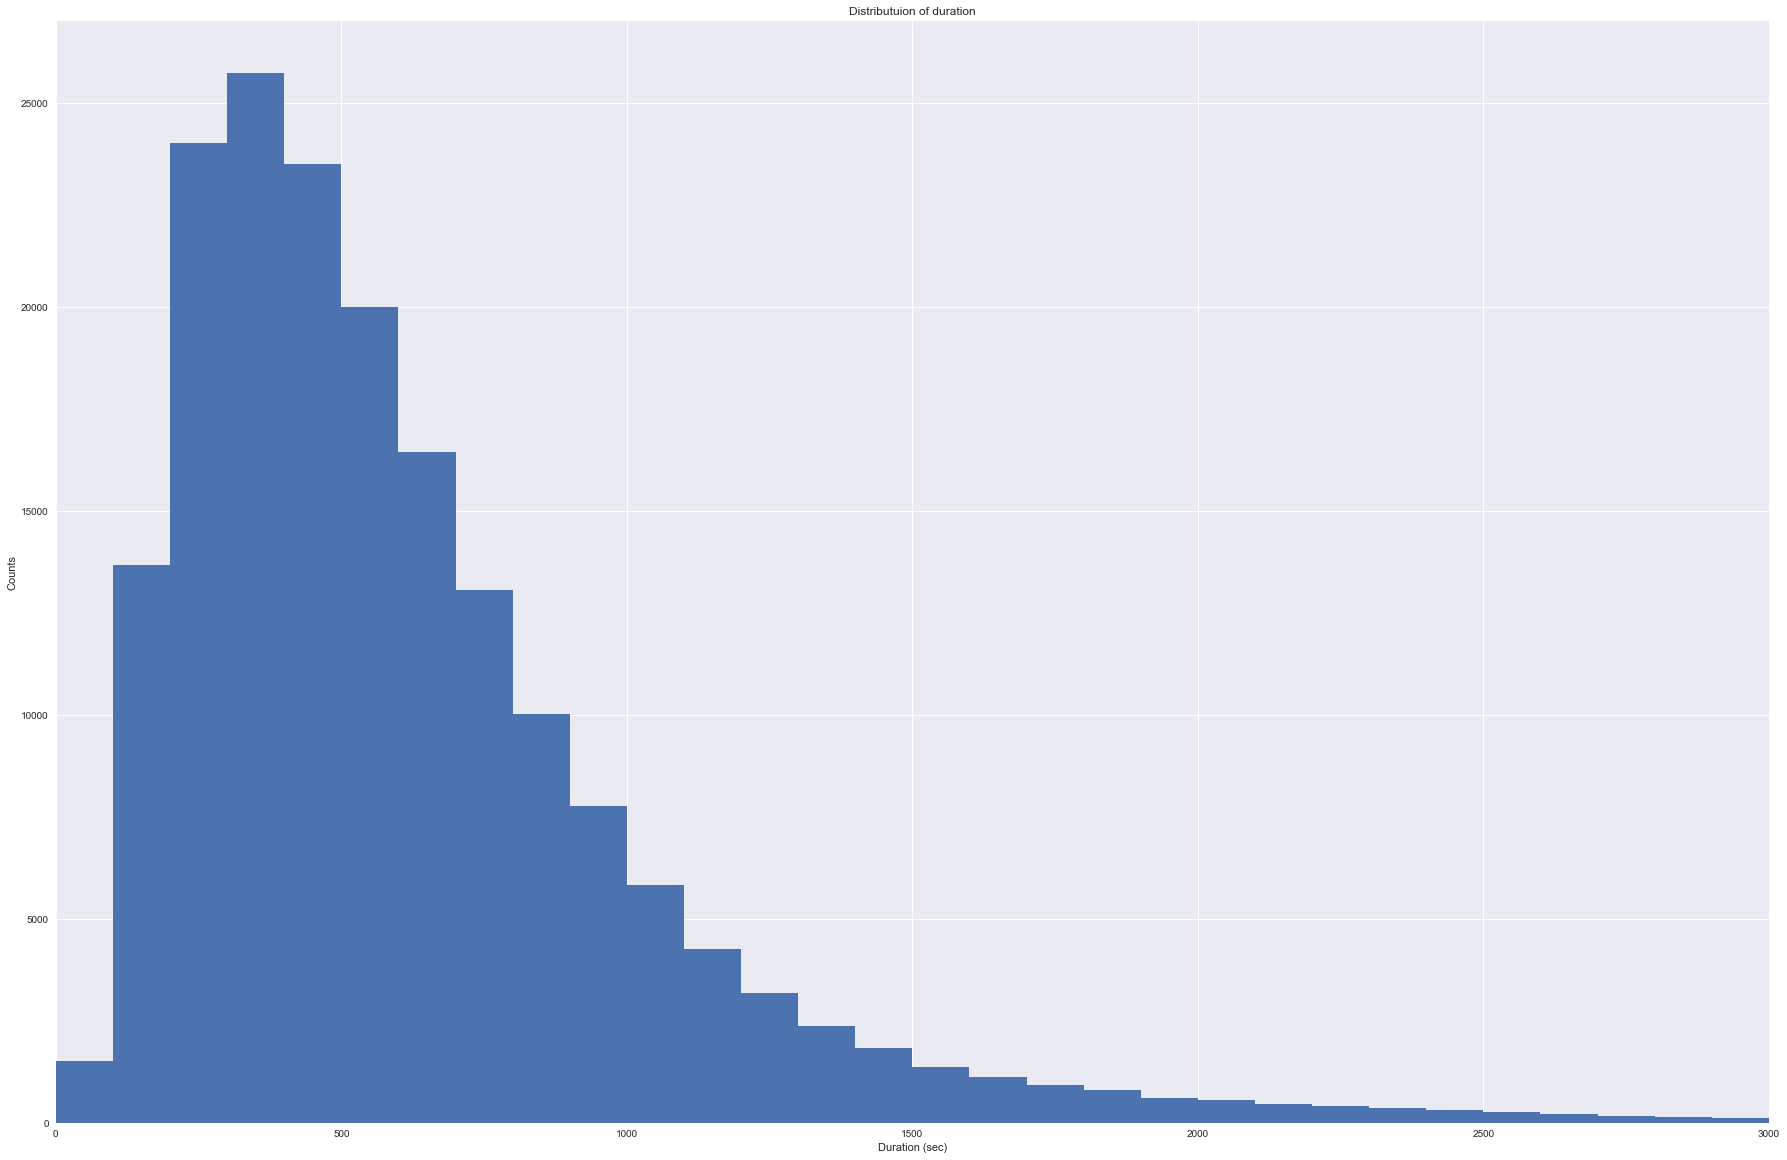

In [17]:
bins = np.arange(0, gbike['duration_sec'].max()+100, 100)
plt.xlim(0,3000)

plt.hist(data = gbike, x = 'duration_sec', bins = bins);

plt.xlabel("Duration (sec)")
plt.ylabel("Counts")
plt.title("Distributuion of duration");


Trip duration values first increases and reach to tha peak the duration od the trip is around 500 sec

the graph is right skewed 

In [18]:
# Converting the seconds into minutes for better understanding of the graph.
bike['duration_min'] = bike['duration_sec'] / 60

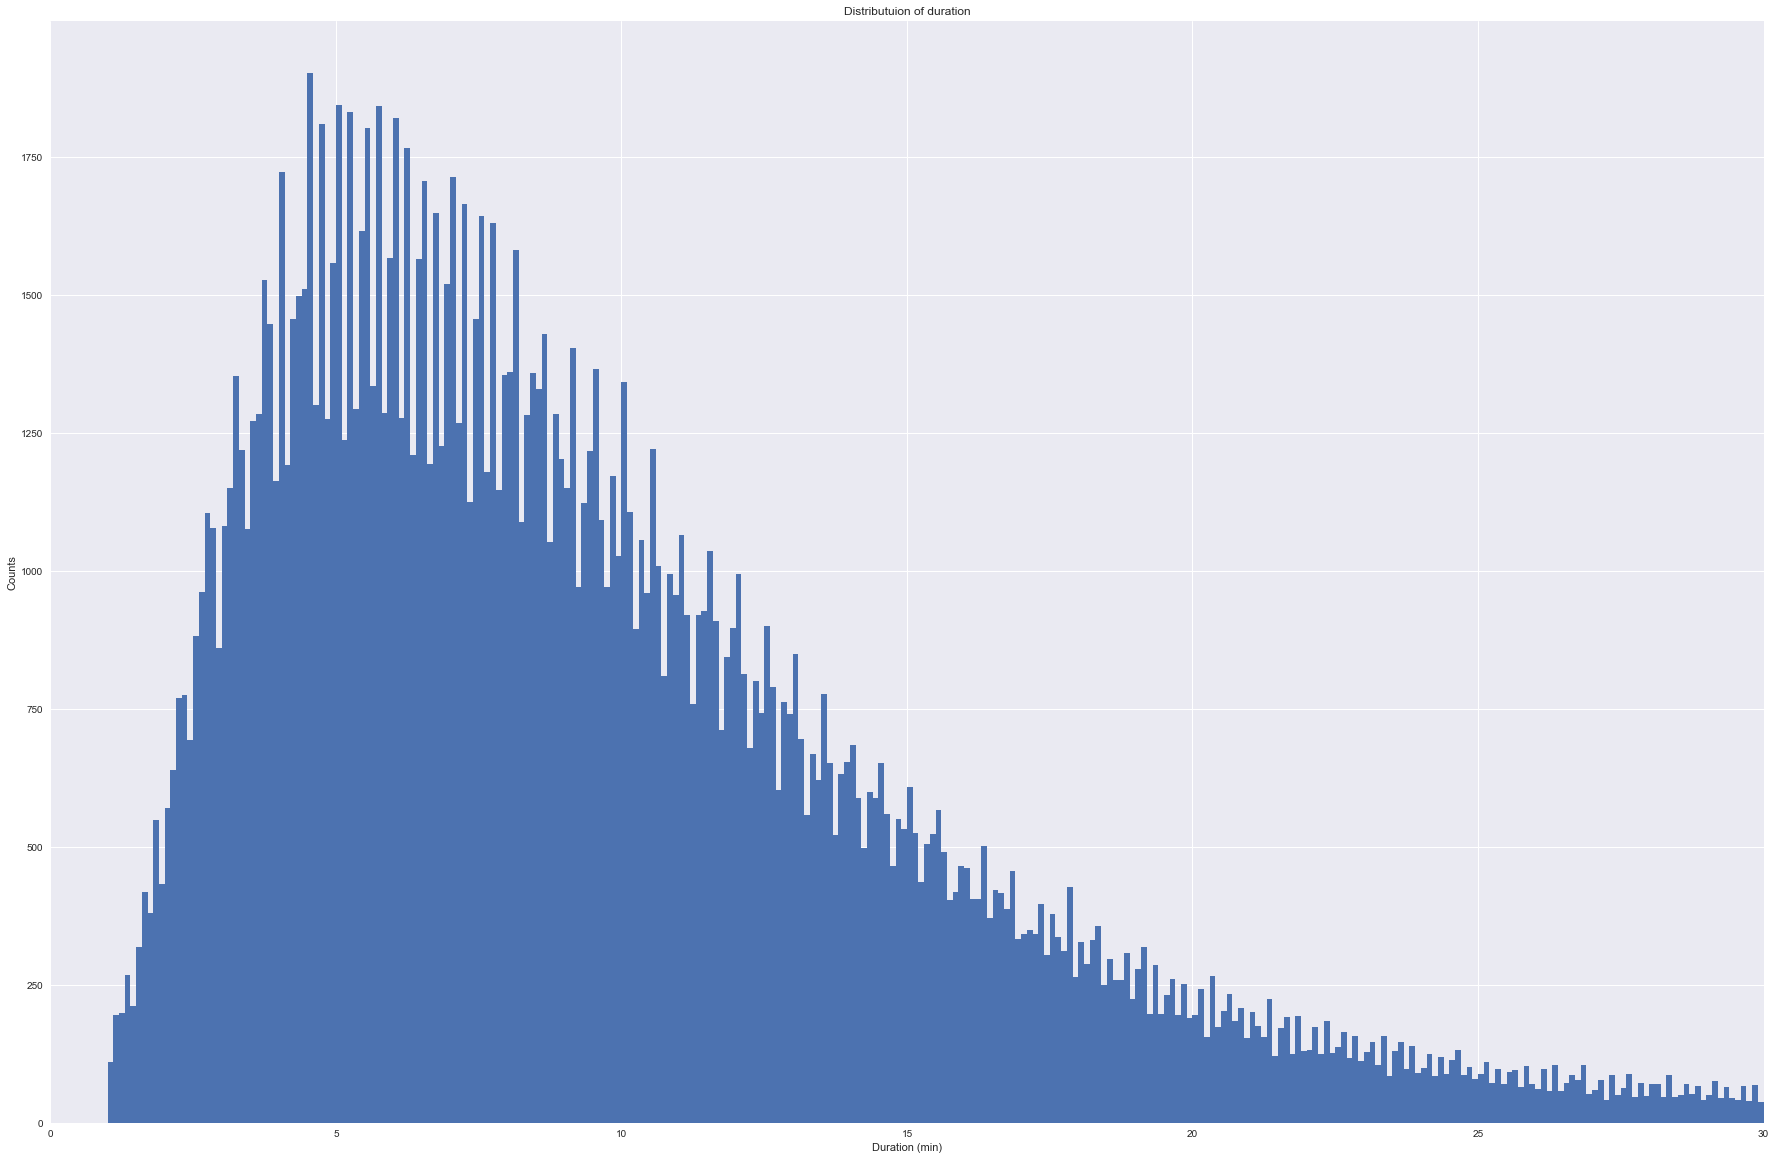

In [19]:
bins = np.arange(0, bike['duration_min'].max()+0.1, 0.1)
plt.xlim(0,30)

plt.hist(data = bike, x = 'duration_min', bins = bins);
plt.xlabel("Duration (min)")
plt.ylabel("Counts")
plt.title("Distributuion of duration");

Trip duration values first increases and reach to tha peak the duration of the trip is around 5 min
the graph is right skewed

#### can we see the outliers of our variable of interest ?

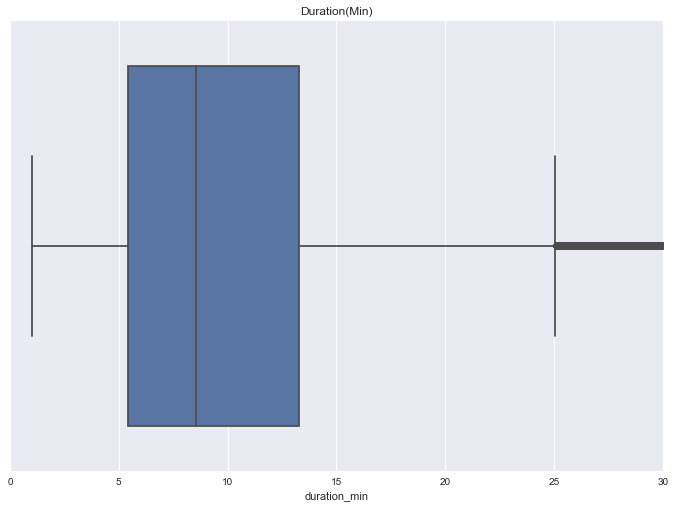

In [20]:
sb.set(rc={'figure.figsize':(11.7,8.27)})

sb.boxplot(x=bike["duration_min"])
plt.xlim(0,30)
plt.title('Duration(Min)');

its clear that we have alot of outliers after whiesker of boxplot 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The trip duration takes a large amount of values and is concentrated to a tail so I looked at it in log transform and found that peak occurs at 5 min then distribution starts to dip and does not regain any more peak value (unimodel).
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

yes i have changed data type of  
[start_time, end_time]to datetime

gbike.bike_share_for_all_trip to boolean as they were wrong data type 

## Bivariate Exploration


### Are there relationship between the Age of the member and the duration of trip?

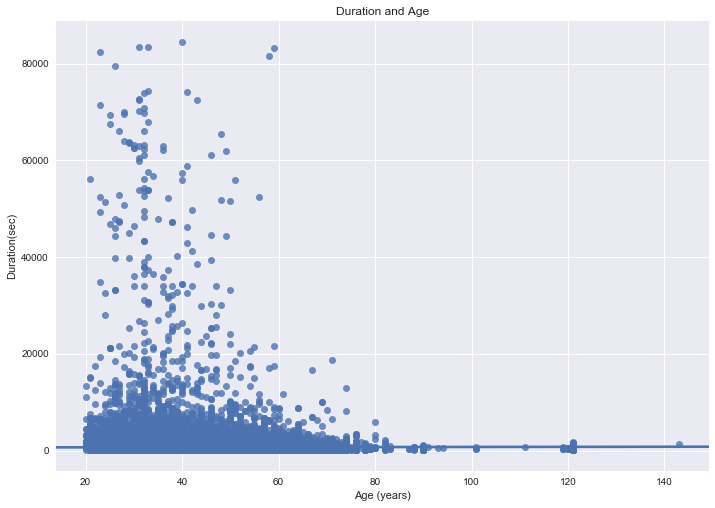

In [21]:
# trip duration and age.

sb.set(rc={'figure.figsize':(11.7,8.27)})

sb.regplot(data = gbike, x =2021-gbike['member_birth_year'], y = 'duration_sec');
plt.xlabel('Age (years)')
plt.ylabel('Duration(sec)')
plt.title("Duration and Age");

it is appear that most of trips are in bet 20 and less than 80 years and it about 10000 durations 

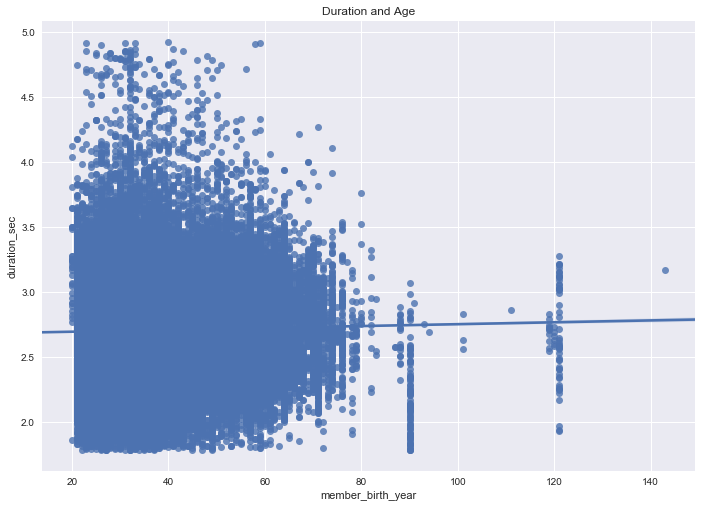

In [22]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(2021-gbike['member_birth_year'], gbike['duration_sec'].apply(log_trans))
plt.title('Duration and Age');

it is appear that most of trips are in bet 20 and less than 80 years and it about 1.0 to 4.0 log transformation durations 

### What is the Most common stations?


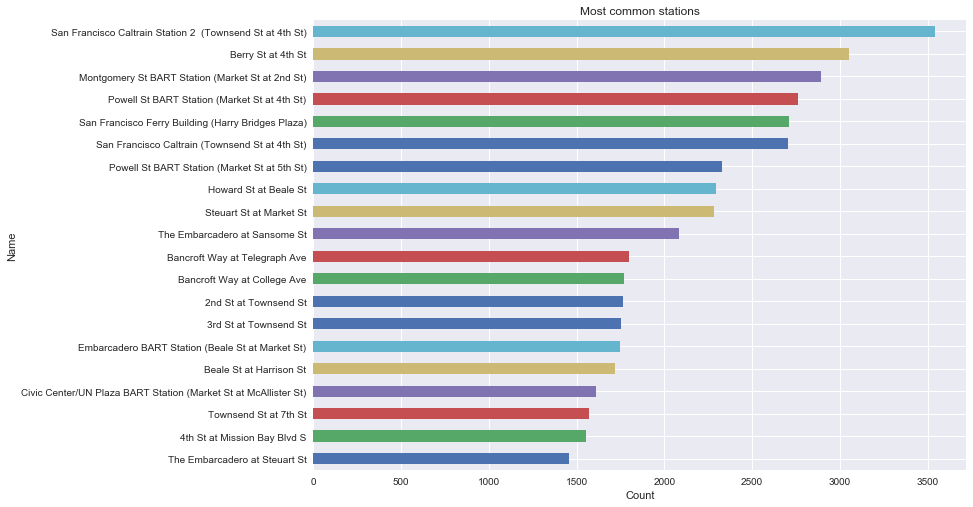

In [24]:
#Most common stations
top_stations = gbike.start_station_name.value_counts()[1:21].sort_values()
top_stations.plot(kind = 'barh')
plt.xlabel('Count')
plt.ylabel('Name')
plt.title('Most common stations');

most common one is 'San Francisco'

some stations are equals in counts 

### What is the type of gender that have longer Duration trip?

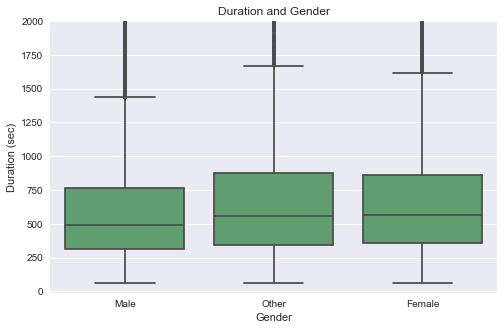

In [25]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = gbike, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2000])

plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title("Duration and Gender");

other rides longer trips then males although number of males are larger

### What is the number of each gender type in each user type ?

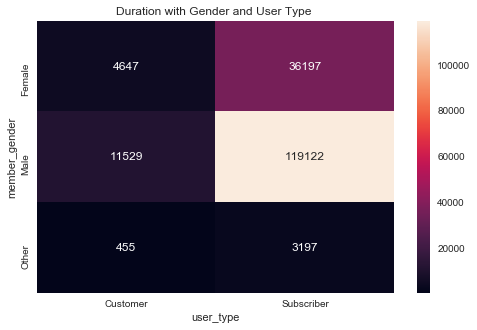

In [26]:
plt.figure(figsize = [8, 5])

counts = gbike.groupby(['member_gender', 'user_type']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index = 'member_gender', columns = 'user_type', values = 'count')
sb.heatmap(counts, annot = True, fmt = 'd')
plt.title("Duration with Gender and User Type ");

as we see duration of male sthat are customer are more than the douple of females that are customers

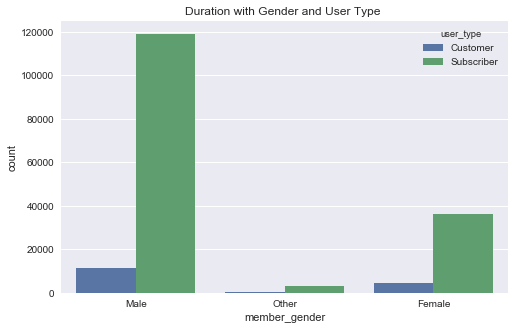

In [27]:
plt.figure(figsize = [8, 5])

sb.countplot(data = gbike, x = 'member_gender', hue = 'user_type')
plt.title("Duration with Gender and User Type ");

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Trip Duration is very dependendable on the age of the member
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

he percentage of female members to take longer trips is higher.

## Multivariate Exploration


### How the average trip time is affected by gender and year?


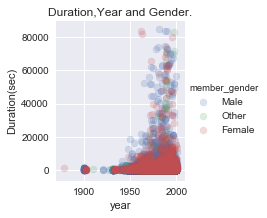

In [28]:
# Finding out how the average trip time is affected by gender and year.
sb.set(rc={'figure.figsize':(20.7,8.27)})

g = sb.FacetGrid(data = gbike, hue = 'member_gender')
g.map(plt.scatter, 'member_birth_year','duration_sec', alpha = 0.2)
g.add_legend()
plt.xlabel('year')
plt.ylabel('Duration(sec)')
plt.title("Duration,Year and Gender.");

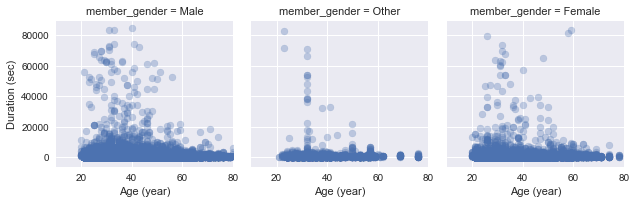

In [29]:
gbike['age'] = (2021 - gbike['member_birth_year'])
g = sb.FacetGrid(data = gbike, col = 'member_gender',xlim = [10, 80])
g.map(plt.scatter, 'age', 'duration_sec', alpha=0.3)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)');



the higher duration trip is higher for male but percentage is higher for women and other, also other has one more peak at nearly the age of 30 years for higher duration time, for female is about two peaks

### How the average trip time is affected by user type and year?


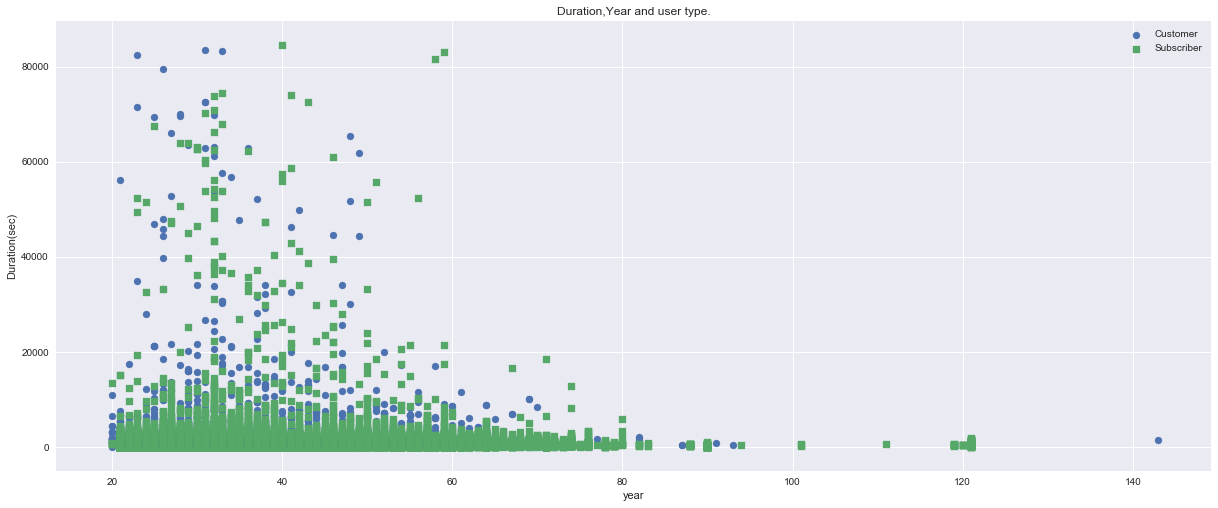

In [30]:
user_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

for user_type, marker in user_markers:
    gbike_user = gbike[gbike['user_type'] == user_type]
    plt.scatter(data = gbike_user, x = (2021 - gbike_user['member_birth_year']), y = gbike_user['duration_sec'], 
                marker = marker)
plt.legend(['Customer','Subscriber'])
plt.xlabel('year')
plt.ylabel('Duration(sec)')
plt.title("Duration,Year and user type.");


Trip duration values first increases due to the increase of the age of the member and reach to tha peak the duration of the trip 
the graph is right skewed
there are outliers 
the higher duration trip is higher for subscriber but percentage is higher for customers

### How the average trip time is affected by bike share and year?


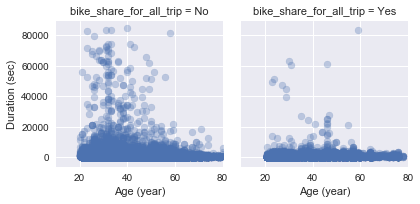

In [31]:
gbike['age'] = (2021 - gbike['member_birth_year'])
b = sb.FacetGrid(data = gbike, col = 'bike_share_for_all_trip',xlim = [10, 80])
b.map(plt.scatter, 'age', 'duration_sec', alpha=0.3)
b.set_xlabels('Age (year)')
b.set_ylabels('Duration (sec)');

bike not share for all trip are higher in the duration of the trip 

In [ ]:
!jupyter nbconvert exploration.ipynb --to slides --post serve --no-input --no-prompt

